<a href="https://colab.research.google.com/github/Baaprado/Pos_Tech_FIAP/blob/main/Fase_3_Tech_Challenge_FIAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tech Challenge - Pós Tech FIAP - Fase 3**

Alunos da turma 6DTAT:
- Barbara Rodrigues Prado RM357381
- Edvaldo Torres RM357417

Fonte dos dados: https://covid19.ibge.gov.br/pnad-covid/

O Head de Dados pediu para que você entrasse na base de dados do PNAD-COVID-19 do IBGE e organizasse esta base para análise, utilizando Banco de Dados em Nuvem e trazendo as seguintes características:

- Utilização de no máximo 20 questionamentos realizados na pesquisa;
- Utilizar 3 meses para construção da solução;
- Caracterização dos sintomas clínicos da população;
- Comportamento da população na época da COVID-19;
- Características econômicas da Sociedade;

Seu objetivo será trazer uma breve análise dessas informações, como foi a organização do banco, as perguntas selecionadas para a resposta do problema e quais seriam as principais ações que o hospital deverá tomar em caso de um novo surto de COVID-19.

# **Leitura inicial dos arquivos**

## **Instalações**

In [ ]:
!pip install pyspark==3.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285391 sha256=c8f808926a5245d301d5feba1ed534ae58b25632a4dabfca7efba14531d644a3
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.3
    Uninstalling pyspark-3.5.3:
      Successfully uninstalled pyspark-3.5.3


In [ ]:
!pip install xlrd

## **Importação das bibliotecas e inicialização da SparkSession**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
import pandas as pd
import re

spark = SparkSession.builder.appName("PNAD_COVID").getOrCreate()

## **Leitura da base com os questionamentos para um DataFrame do PySpark**

In [ ]:
!wget "https://github.com/Baaprado/Pos_Tech_FIAP/raw/main/072020.zip" -O "072020.zip"
!unzip -o "072020.zip" -d "072020"

caminho_arquivo_csv = "072020/PNAD_COVID_072020.csv"
microdados_072020 = spark.read.csv(caminho_arquivo_csv, header=True, inferSchema=True, sep=",")

--2024-12-17 21:41:03--  https://github.com/Baaprado/Pos_Tech_FIAP/raw/main/072020.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Baaprado/Pos_Tech_FIAP/main/072020.zip [following]
--2024-12-17 21:41:03--  https://raw.githubusercontent.com/Baaprado/Pos_Tech_FIAP/main/072020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14242290 (14M) [application/zip]
Saving to: ‘072020.zip’

072020.zip          100%[===================>]  13.58M  63.7MB/s    in 0.2s    

2024-12-17 21:41:04 (63.7 MB/s) - ‘072020.zip’ saved [14242290/14242290]

Archive:  072020.zip
  inflating: 072020/Dicionario_PNAD_

In [ ]:
!wget "https://github.com/Baaprado/Pos_Tech_FIAP/raw/main/092020.zip" -O "092020.zip"
!unzip -o "092020.zip" -d "092020"

caminho_arquivo_csv = "092020/PNAD_COVID_092020.csv"
microdados_092020 = spark.read.csv(caminho_arquivo_csv, header=True, inferSchema=True, sep=",")

--2024-12-17 21:41:32--  https://github.com/Baaprado/Pos_Tech_FIAP/raw/main/092020.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Baaprado/Pos_Tech_FIAP/main/092020.zip [following]
--2024-12-17 21:41:32--  https://raw.githubusercontent.com/Baaprado/Pos_Tech_FIAP/main/092020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15777969 (15M) [application/zip]
Saving to: ‘092020.zip’

092020.zip          100%[===================>]  15.05M  67.6MB/s    in 0.2s    

2024-12-17 21:41:33 (67.6 MB/s) - ‘092020.zip’ saved [15777969/15777969]

Archive:  092020.zip
  inflating: 092020/Dicionario_PNAD_

In [ ]:
!wget "https://github.com/Baaprado/Pos_Tech_FIAP/raw/main/112020.zip" -O "112020.zip"
!unzip -o "112020.zip" -d "112020"

caminho_arquivo_csv = "112020/PNAD_COVID_112020.csv"
microdados_112020 = spark.read.csv(caminho_arquivo_csv, header=True, inferSchema=True, sep=",")

--2024-12-17 21:41:43--  https://github.com/Baaprado/Pos_Tech_FIAP/raw/main/112020.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Baaprado/Pos_Tech_FIAP/main/112020.zip [following]
--2024-12-17 21:41:43--  https://raw.githubusercontent.com/Baaprado/Pos_Tech_FIAP/main/112020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16693899 (16M) [application/zip]
Saving to: ‘112020.zip’

112020.zip          100%[===================>]  15.92M  71.5MB/s    in 0.2s    

2024-12-17 21:41:44 (71.5 MB/s) - ‘112020.zip’ saved [16693899/16693899]

Archive:  112020.zip
  inflating: 112020/Dicionario_PNAD_

In [ ]:
microdados_072020.show()

+----+---+-------+-------+-----+-----+-----+-----+-------+---------+-----+-----+------+------------+------------+------+----+-----+------+------+------+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+----+----+-----+-----+-----+----+----+-----+-----+-----+-----+-----+------+------+-----+----+----+-----+----+-----+------+------+-----+------+------+-----+-----+-----+------+-------+-------+------+-------+-------+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+----+-----+-----+------+------+------+------+------+-----+----+
| Ano| UF|CAPITAL|RM_RIDE|V1008|V1012|V1013|V1016|Estrato|      UPA|V1022|V1023| V1030|       V1031|       V10

## **Seleção das questões a serem analisadas e união dos DataFrames referentes a 3 meses**

In [ ]:
selected_columns = ['UF','V1013','A002','A003','A004','A005','C007D','C01011','C013','C016','D0051','B0011','B0012','B0014','B0016','B00111','B002','B005','B007','B011']

df_pnad_202007_selected = microdados_072020.select(selected_columns)
df_pnad_202009_selected = microdados_092020.select(selected_columns)
df_pnad_202011_selected = microdados_112020.select(selected_columns)
df_final = df_pnad_202007_selected.union(df_pnad_202009_selected).union(df_pnad_202011_selected)

df_final.show()

+---+-----+----+----+----+----+-----+------+----+----+-----+-----+-----+-----+-----+------+----+----+----+----+
| UF|V1013|A002|A003|A004|A005|C007D|C01011|C013|C016|D0051|B0011|B0012|B0014|B0016|B00111|B002|B005|B007|B011|
+---+-----+----+----+----+----+-----+------+----+----+-----+-----+-----+-----+-----+------+----+----+----+----+
| 11|    7|  35|   1|   4|   5|    6|     4|null|null|    1|    2|    2|    2|    2|     2|null|null|   1|   2|
| 11|    7|  29|   2|   4|   7| null|  null|null|  10|    1|    2|    2|    2|    2|     2|null|null|   2|   3|
| 11|    7|  13|   1|   4|   2| null|  null|null|null|    1|    2|    2|    2|    2|     2|null|null|   1|   4|
| 11|    7|  10|   1|   4|   2| null|  null|null|null|    1|    2|    2|    2|    2|     2|null|null|   1|   4|
| 11|    7|  57|   2|   1|   2| null|  null|null|   1|    2|    2|    2|    2|    2|     2|null|null|   2|   3|
| 11|    7|  47|   1|   4|   2|    5|     5|null|null|    1|    2|    2|    2|    2|     2|null|null|   

## **Tratamento do DataFrame de acordo com o dicionário**

In [ ]:
UF = {
    11: "Rondônia",12: "Acre",13: "Amazonas",14: "Roraima",15: "Pará",16: "Amapá",
    17: "Tocantins",21: "Maranhão",22: "Piauí",23: "Ceará",24: "Rio Grande do Norte",
    25: "Paraíba",26: "Pernambuco",27: "Alagoas",28: "Sergipe",29: "Bahia",31: "Minas Gerais",
    32: "Espírito Santo",33: "Rio de Janeiro",35: "São Paulo",41: "Paraná",42: "Santa Catarina",
    43: "Rio Grande do Sul",50: "Mato Grosso do Sul",51: "Mato Grosso",52: "Goiás",53: "Distrito Federal"}

A003 ={1:'Homem',2:'Mulher'}
A004 ={1:'Branca',2:'Preta',3:'Amarela',4:'Parda',5:'Indígena',9:'Não informado'}
A005 = {1: "Sem instrução",2: "Fundamental incompleto",3: "Fundamental completo",4: "Médio incompleto",5: "Médio completo",6: "Superior incompleto",7: "Superior completo",8:"Pós Graduação, Mestrado ou Doutorado"}
C007D = {
            1: "Agricultura, pecuária, produção florestal e pesca",
            2: "Extração de petróleo, carvão mineral, minerais metálicos, pedra, areia, sal etc.",
            3: "Indústria da transformação (inclusive confecção e fabricação caseira)",
            4: "Fornecimento de eletricidade e gás, água, esgoto e coleta de lixo",
            5: "Construção",
            6: "Comércio no atacado e varejo",
            7: "Reparação de veículos automotores e motocicletas",
            8: "Transporte de passageiros",
            9: "Transporte de mercadorias",
            10: "Armazenamento, correios e serviços de entregas",
            11: "Hospedagem (hotéis, pousadas etc.)",
            12: "Serviço de alimentação (bares, restaurantes, ambulantes de alimentação)",
            13: "Informação e comunicação (jornais, rádio e televisão, telecomunicações e informática)",
            14: "Bancos, atividades financeiras e de seguros",
            15: "Atividades imobiliárias",
            16: "Escritórios de advocacia, engenharia, publicidade e veterinária (Atividades profissionais, científicas e técnicas)",
            17: "Atividades de locação de mão de obra, segurança, limpeza, paisagismo e teleatendimento",
            18: "Administração pública (governo federal, estadual e municipal)",
            19: "Educação",
            20: "Saúde humana e assistência social",
            21: "Organizações religiosas, sindicatos e associações",
            22: "Atividades artísticas, esportivas e de recreação",
            23: "Cabeleireiros, tratamento de beleza e serviços pessoais",
            24: "Serviço doméstico remunerado (será imputado da posição na ocupação)",
            25: "Outro"
        }
C01011 = {
    0: "0 - 100",
    1: "101 - 300",
    2: "301 - 600",
    3: "601 - 800",
    4: "801 - 1.600",
    5: "1.601 - 3.000",
    6: "3.001 - 10.000",
    7: "10.001 - 50.000",
    8: "50.001 - 100.000",
    9: "Mais de 100.000"
}

C013 = {1: "Sim",2: "Não"}

C016 = {
        1: "Devido à pandemia (isolamento, quarentena ou distanciamento social)",
        2: "Por problemas de saúde ou gravidez",
        4: "Não quer trabalhar ou é aposentado",
        5: "Não tinha experiência profissional ou qualificação",
        6: "Acha que não vai encontrar trabalho por ser muito jovem ou idoso",
        7: "Não havia trabalho na localidade",
        8: "Tinha que cuidar dos afazeres domésticos e/ou de parentes",
        9: "Estava aguardando resposta de medida tomada para conseguir trabalho",
        10: "Outro motivo"
       }

D0051 = {1: "Sim",2: "Não"}
B0011 = {1: "Sim",2: "Não",3: "Não sei",9: "Ignorado"}
B0012 = {1: "Sim",2: "Não",3: "Não sei",9: "Ignorado"}
B0014 = {1: "Sim",2: "Não",3: "Não sei",9: "Ignorado"}
B0016 = {1: "Sim",2: "Não",3: "Não sei",9: "Ignorado"}
B00111 = {1: "Sim",2: "Não",3: "Não sei",9: "Ignorado"}
B002 = {1: "Sim",2: "Não",9: "Ignorado"}
B005 = {1: "Sim",2: "Não",9: "Ignorado"}
B007 = {1: "Sim",2: "Não",9: "Ignorado"}
B011 = {
        1: "Não fez restrição, levou vida normal como antes da pandemia",
        2: "Reduziu o contato com as pessoas, mas continuou saindo de casa para trabalho ou atividades não essenciais e/ou recebendo visitas",
        3: "Ficou em casa e só saiu em caso de necessidade básica",
        4: "Ficou rigorosamente em casa",
        9: "Ignorado"
        }

In [ ]:
from itertools import chain

NME_COLUNA =['UF','NUM_MES_PESQUISA','NUM_IDADE_MORADOR','DSC_SEXO','DSC_COR_RACA','DSC_NIVEL_INSTRUCAO','DSC_AREA_ATUACAO','DSC_FAIXA_RECEBIDO','DSC_TELETRABALHO','DSC_MOTIVO_N_PROCUROU_TRABALHO','DSC_AUXILIO_CORONAVIRUS','DSC_FEBRE','DSC_TOSSE','DSC_DIFICULDADE_RESPIRATORIA','DSC_DOR_PEITO','DSC_PERDA_OLFATO_PALADAR','DSC_FOI_ESTABELECIMENTO_SAUDE','DSC_FOI_INTERNADO','DSC_PLANO_SAUDE','DSC_CONTATO_COM_OUTRAS_PESSOAS']

col_dict = {
    'UF': UF,
    'A003': A003,
    'A004': A004,
    'A005': A005,
    'C007D': C007D,
    'C01011':C01011,
    'C013':C013,
    'C016':C016,
    'D0051':D0051,
    'B0011':B0011,
    'B0012':B0012,
    'B0014':B0014,
    'B0016':B0016,
    'B00111':B00111,
    'B002':B002,
    'B005':B005,
    'B007':B007,
    'B011':B011
}

for col, lookup in col_dict.items():
    mapping_expr = when(df_final[col].isin(list(lookup.keys())),
                      create_map([lit(x) for x in chain(*lookup.items())])[df_final[col]]) \
                   .otherwise(df_final[col])

    df_final= df_final.withColumn(col, mapping_expr)

df_final= df_final.toDF(*NME_COLUNA)

df_final= df_final.na.fill('Não aplicável')

## **Visualização do DataFrame**

In [ ]:
df_final.show()

+--------+----------------+-----------------+--------+------------+--------------------+--------------------+------------------+----------------+------------------------------+-----------------------+---------+---------+----------------------------+-------------+------------------------+-----------------------------+-----------------+---------------+------------------------------+
|      UF|NUM_MES_PESQUISA|NUM_IDADE_MORADOR|DSC_SEXO|DSC_COR_RACA| DSC_NIVEL_INSTRUCAO|    DSC_AREA_ATUACAO|DSC_FAIXA_RECEBIDO|DSC_TELETRABALHO|DSC_MOTIVO_N_PROCUROU_TRABALHO|DSC_AUXILIO_CORONAVIRUS|DSC_FEBRE|DSC_TOSSE|DSC_DIFICULDADE_RESPIRATORIA|DSC_DOR_PEITO|DSC_PERDA_OLFATO_PALADAR|DSC_FOI_ESTABELECIMENTO_SAUDE|DSC_FOI_INTERNADO|DSC_PLANO_SAUDE|DSC_CONTATO_COM_OUTRAS_PESSOAS|
+--------+----------------+-----------------+--------+------------+--------------------+--------------------+------------------+----------------+------------------------------+-----------------------+---------+---------+------------

# **Exploração dos dados**

## **Exploração inicial**

In [ ]:
df_final.createOrReplaceTempView("tabela_microdados")

### **1. Distribuição de sexo**

In [ ]:
spark.sql("""
SELECT
 NUM_MES_PESQUISA,
 DSC_SEXO,
 COUNT(*) AS TOTAL,
 ROUND((COUNT(*) * 100.0 / SUM(COUNT(*)) OVER ()), 2) AS PERCENTUAL
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA, DSC_SEXO
ORDER BY NUM_MES_PESQUISA, TOTAL DESC
""").show()

+----------------+--------+------+----------+
|NUM_MES_PESQUISA|DSC_SEXO| TOTAL|PERCENTUAL|
+----------------+--------+------+----------+
|               7|  Mulher|199726|     17.32|
|               7|   Homem|184440|     16.00|
|               9|  Mulher|201562|     17.48|
|               9|   Homem|185736|     16.11|
|              11|  Mulher|198827|     17.25|
|              11|   Homem|182611|     15.84|
+----------------+--------+------+----------+



In [ ]:
import plotly.express as px

sexo_df = spark.sql("""
SELECT
    NUM_MES_PESQUISA,
    DSC_SEXO,
    COUNT(*) AS TOTAL
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA, DSC_SEXO
ORDER BY NUM_MES_PESQUISA, DSC_SEXO
""").toPandas()

sexo_df['NUM_MES_PESQUISA'] = sexo_df['NUM_MES_PESQUISA'].replace({
    7: "Julho",
    9: "Setembro",
    11: "Novembro"
})

fig = px.bar(
    sexo_df,
    x="NUM_MES_PESQUISA",
    y="TOTAL",
    color="DSC_SEXO",
    text="TOTAL",
    title="Distribuição de Sexo por Mês",
    labels={"TOTAL": "Total de Pessoas", "NUM_MES_PESQUISA": "Mês da Pesquisa"},
)

fig.update_layout(
    barmode="group",
    xaxis_title="Mês da Pesquisa",
    yaxis_title="Total de Pessoas",
    legend_title="Sexo",
    font=dict(size=12, family="Arial", color="black"),
)

fig.update_traces(textposition='outside', marker=dict(line=dict(width=1, color='black')))

fig.show()

### **2. Distribuição de cor/raça**

In [ ]:
spark.sql("""
SELECT
 NUM_MES_PESQUISA,
 DSC_COR_RACA,
 COUNT(*) AS TOTAL,
 ROUND((COUNT(*) * 100.0 / SUM(COUNT(*)) OVER ()), 2) AS PERCENTUAL
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA, DSC_COR_RACA
ORDER BY NUM_MES_PESQUISA, TOTAL DESC
""").show()

+----------------+-------------+------+----------+
|NUM_MES_PESQUISA| DSC_COR_RACA| TOTAL|PERCENTUAL|
+----------------+-------------+------+----------+
|               7|        Parda|188460|     16.35|
|               7|       Branca|160382|     13.91|
|               7|        Preta| 31372|      2.72|
|               7|      Amarela|  2387|      0.21|
|               7|     Indígena|  1468|      0.13|
|               7|Não informado|    97|      0.01|
|               9|        Parda|190034|     16.48|
|               9|       Branca|161626|     14.02|
|               9|        Preta| 31766|      2.76|
|               9|      Amarela|  2293|      0.20|
|               9|     Indígena|  1489|      0.13|
|               9|Não informado|    90|      0.01|
|              11|        Parda|186954|     16.22|
|              11|       Branca|159256|     13.81|
|              11|        Preta| 31404|      2.72|
|              11|      Amarela|  2240|      0.19|
|              11|     Indígena

In [ ]:
df_raca = spark.sql("""
SELECT
 NUM_MES_PESQUISA,
 DSC_COR_RACA,
 COUNT(*) AS TOTAL,
 ROUND((COUNT(*) * 100.0 / SUM(COUNT(*)) OVER ()), 2) AS PERCENTUAL
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA, DSC_COR_RACA
ORDER BY NUM_MES_PESQUISA, TOTAL DESC
""").toPandas()

df_raca['NUM_MES_PESQUISA'] = df_raca['NUM_MES_PESQUISA'].replace({
    7: "Julho",
    9: "Setembro",
    11: "Novembro"
})

fig_bar = px.bar(
    df_raca,
    x="NUM_MES_PESQUISA",
    y="PERCENTUAL",
    color="DSC_COR_RACA",
    title="Distribuição Percentual da População por Cor/Raça ao Longo dos Meses",
    labels={"PERCENTUAL": "Percentual (%)", "NUM_MES_PESQUISA": "Mês da Pesquisa"},
    text_auto=True
)

fig_bar.update_layout(barmode="stack", xaxis_title="Mês da Pesquisa", yaxis_title="Percentual (%)")
fig_bar.show()

### **3. Distribuição de nível de instrução**

In [ ]:
spark.sql("""
SELECT
 NUM_MES_PESQUISA,
 DSC_NIVEL_INSTRUCAO,
 COUNT(*) AS TOTAL
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA, DSC_NIVEL_INSTRUCAO
ORDER BY NUM_MES_PESQUISA, TOTAL DESC
""").show()

+----------------+--------------------+------+
|NUM_MES_PESQUISA| DSC_NIVEL_INSTRUCAO| TOTAL|
+----------------+--------------------+------+
|               7|Fundamental incom...|129643|
|               7|      Médio completo| 85796|
|               7|       Sem instrução| 41240|
|               7|   Superior completo| 36101|
|               7|    Médio incompleto| 36006|
|               7|Fundamental completo| 25495|
|               7| Superior incompleto| 20007|
|               7|Pós Graduação, Me...|  9878|
|               9|Fundamental incom...|130890|
|               9|      Médio completo| 86118|
|               9|       Sem instrução| 41948|
|               9|    Médio incompleto| 36291|
|               9|   Superior completo| 36172|
|               9|Fundamental completo| 25595|
|               9| Superior incompleto| 20119|
|               9|Pós Graduação, Me...| 10165|
|              11|Fundamental incom...|128517|
|              11|      Médio completo| 85137|
|            

In [ ]:
instrucao_df = spark.sql("""
SELECT
    NUM_MES_PESQUISA,
    DSC_NIVEL_INSTRUCAO,
    COUNT(*) AS TOTAL
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA, DSC_NIVEL_INSTRUCAO
ORDER BY NUM_MES_PESQUISA, DSC_NIVEL_INSTRUCAO
""").toPandas()

instrucao_df['NUM_MES_PESQUISA'] = instrucao_df['NUM_MES_PESQUISA'].replace({
    7: "Julho",
    9: "Setembro",
    11: "Novembro"
})

fig = px.bar(
    instrucao_df,
    x="NUM_MES_PESQUISA",
    y="TOTAL",
    color="DSC_NIVEL_INSTRUCAO",
    text="TOTAL",
    title="Distribuição de Nível de Instrução por Mês",
    labels={"TOTAL": "Total de Pessoas", "NUM_MES_PESQUISA": "Mês da Pesquisa", "DSC_NIVEL_INSTRUCAO": "Nível de Instrução"},
)

fig.update_layout(
    barmode="stack",
    xaxis_title="Mês da Pesquisa",
    yaxis_title="Total de Pessoas",
    legend_title="Nível de Instrução",
    font=dict(size=12, family="Arial", color="black"),
    legend=dict(x=1.05, y=1, traceorder="normal"),
)

fig.update_traces(textposition='inside', marker=dict(line=dict(width=1, color='black')))

fig.show()

### **4. Estatísticas descritivas da idade**

In [ ]:
spark.sql("""
SELECT
 NUM_MES_PESQUISA,
 MIN(NUM_IDADE_MORADOR) AS IDADE_MIN,
 MAX(NUM_IDADE_MORADOR) AS IDADE_MAX,
 CAST(AVG(NUM_IDADE_MORADOR) AS INT) AS IDADE_MEDIA,
 CAST(PERCENTILE(NUM_IDADE_MORADOR, 0.5) AS INT) AS IDADE_MEDIANA
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA
ORDER BY NUM_MES_PESQUISA
""").show()

+----------------+---------+---------+-----------+-------------+
|NUM_MES_PESQUISA|IDADE_MIN|IDADE_MAX|IDADE_MEDIA|IDADE_MEDIANA|
+----------------+---------+---------+-----------+-------------+
|               7|        0|      111|         36|           36|
|               9|        0|      111|         36|           36|
|              11|        0|      111|         37|           36|
+----------------+---------+---------+-----------+-------------+



In [ ]:
import plotly.graph_objects as go

idade_df = spark.sql("""
SELECT
    NUM_MES_PESQUISA,
    MIN(NUM_IDADE_MORADOR) AS IDADE_MIN,
    MAX(NUM_IDADE_MORADOR) AS IDADE_MAX,
    CAST(AVG(NUM_IDADE_MORADOR) AS INT) AS IDADE_MEDIA,
    CAST(PERCENTILE(NUM_IDADE_MORADOR, 0.5) AS INT) AS IDADE_MEDIANA
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA
ORDER BY NUM_MES_PESQUISA
""").toPandas()

idade_df['NUM_MES_PESQUISA'] = idade_df['NUM_MES_PESQUISA'].replace({
    7: "Julho",
    9: "Setembro",
    11: "Novembro"
})

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=idade_df['NUM_MES_PESQUISA'],
    y=idade_df['IDADE_MIN'],
    mode='lines+markers',
    name='Idade Mínima',
    line=dict(color='blue', width=2, dash='solid'),
    marker=dict(size=8)
))

fig.add_trace(go.Scatter(
    x=idade_df['NUM_MES_PESQUISA'],
    y=idade_df['IDADE_MAX'],
    mode='lines+markers',
    name='Idade Máxima',
    line=dict(color='red', width=2, dash='dot'),
    marker=dict(size=8)
))

fig.add_trace(go.Scatter(
    x=idade_df['NUM_MES_PESQUISA'],
    y=idade_df['IDADE_MEDIA'],
    mode='lines+markers',
    name='Idade Média',
    line=dict(color='green', width=2, dash='solid'),
    marker=dict(size=8)
))

fig.add_trace(go.Scatter(
    x=idade_df['NUM_MES_PESQUISA'],
    y=idade_df['IDADE_MEDIANA'],
    mode='lines+markers',
    name='Idade Mediana',
    line=dict(color='purple', width=2, dash='dash'),
    marker=dict(size=8)
))

fig.update_layout(
    title='Estatísticas Descritivas da Idade por Mês',
    xaxis_title='Mês da Pesquisa',
    yaxis_title='Idade',
    font=dict(size=12, family="Arial", color="black"),
    xaxis=dict(tickmode='array', tickvals=idade_df['NUM_MES_PESQUISA'], tickangle=0),
    legend_title="Estatísticas",
    legend=dict(x=1.05, y=1, traceorder="normal"),
    template='plotly_white',
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()

### **5. Incidência de sintomas por faixa etária**

In [ ]:
spark.sql("""
SELECT
    NUM_MES_PESQUISA,
    CASE
        WHEN NUM_IDADE_MORADOR BETWEEN 0 AND 17 THEN '0-17'
        WHEN NUM_IDADE_MORADOR BETWEEN 18 AND 35 THEN '18-35'
        WHEN NUM_IDADE_MORADOR BETWEEN 36 AND 60 THEN '36-60'
        ELSE '60+'
    END AS FAIXA_ETARIA,
    'Febre' AS SINTOMA, COUNT(*) AS TOTAL
FROM tabela_microdados
WHERE DSC_FEBRE = 'Sim'
GROUP BY NUM_MES_PESQUISA, FAIXA_ETARIA

UNION ALL

SELECT
    NUM_MES_PESQUISA,
    CASE
        WHEN NUM_IDADE_MORADOR BETWEEN 0 AND 17 THEN '0-17'
        WHEN NUM_IDADE_MORADOR BETWEEN 18 AND 35 THEN '18-35'
        WHEN NUM_IDADE_MORADOR BETWEEN 36 AND 60 THEN '36-60'
        ELSE '60+'
    END AS FAIXA_ETARIA,
    'Tosse' AS SINTOMA, COUNT(*) AS TOTAL
FROM tabela_microdados
WHERE DSC_TOSSE = 'Sim'
GROUP BY NUM_MES_PESQUISA, FAIXA_ETARIA

UNION ALL

SELECT
    NUM_MES_PESQUISA,
    CASE
        WHEN NUM_IDADE_MORADOR BETWEEN 0 AND 17 THEN '0-17'
        WHEN NUM_IDADE_MORADOR BETWEEN 18 AND 35 THEN '18-35'
        WHEN NUM_IDADE_MORADOR BETWEEN 36 AND 60 THEN '36-60'
        ELSE '60+'
    END AS FAIXA_ETARIA,
    'Dificuldade Respiratória' AS SINTOMA, COUNT(*) AS TOTAL
FROM tabela_microdados
WHERE DSC_DIFICULDADE_RESPIRATORIA = 'Sim'
GROUP BY NUM_MES_PESQUISA, FAIXA_ETARIA

UNION ALL

SELECT
    NUM_MES_PESQUISA,
    CASE
        WHEN NUM_IDADE_MORADOR BETWEEN 0 AND 17 THEN '0-17'
        WHEN NUM_IDADE_MORADOR BETWEEN 18 AND 35 THEN '18-35'
        WHEN NUM_IDADE_MORADOR BETWEEN 36 AND 60 THEN '36-60'
        ELSE '60+'
    END AS FAIXA_ETARIA,
    'Dor no Peito' AS SINTOMA, COUNT(*) AS TOTAL
FROM tabela_microdados
WHERE DSC_DOR_PEITO = 'Sim'
GROUP BY NUM_MES_PESQUISA, FAIXA_ETARIA

UNION ALL

SELECT
    NUM_MES_PESQUISA,
    CASE
        WHEN NUM_IDADE_MORADOR BETWEEN 0 AND 17 THEN '0-17'
        WHEN NUM_IDADE_MORADOR BETWEEN 18 AND 35 THEN '18-35'
        WHEN NUM_IDADE_MORADOR BETWEEN 36 AND 60 THEN '36-60'
        ELSE '60+'
    END AS FAIXA_ETARIA,
    'Perda de Olfato ou Paladar' AS SINTOMA, COUNT(*) AS TOTAL
FROM tabela_microdados
WHERE DSC_PERDA_OLFATO_PALADAR = 'Sim'
GROUP BY NUM_MES_PESQUISA, FAIXA_ETARIA
""").show()

+----------------+------------+-------+-----+
|NUM_MES_PESQUISA|FAIXA_ETARIA|SINTOMA|TOTAL|
+----------------+------------+-------+-----+
|               7|       18-35|  Febre| 1678|
|               7|        0-17|  Febre| 1134|
|               7|       36-60|  Febre| 2307|
|               7|         60+|  Febre|  713|
|               9|         60+|  Febre|  385|
|               9|       36-60|  Febre| 1129|
|               9|        0-17|  Febre|  687|
|               9|       18-35|  Febre|  883|
|              11|       36-60|  Febre| 1165|
|              11|         60+|  Febre|  364|
|              11|       18-35|  Febre|  909|
|              11|        0-17|  Febre|  730|
|               7|       18-35|  Tosse| 2128|
|               7|        0-17|  Tosse| 1304|
|               7|       36-60|  Tosse| 3392|
|               7|         60+|  Tosse| 1658|
|               9|         60+|  Tosse| 1122|
|               9|       36-60|  Tosse| 2018|
|               9|        0-17|  T

In [ ]:
sintomas_df = spark.sql("""
SELECT
    NUM_MES_PESQUISA,
    CASE
        WHEN NUM_IDADE_MORADOR BETWEEN 0 AND 17 THEN '0-17'
        WHEN NUM_IDADE_MORADOR BETWEEN 18 AND 35 THEN '18-35'
        WHEN NUM_IDADE_MORADOR BETWEEN 36 AND 60 THEN '36-60'
        ELSE '60+'
    END AS FAIXA_ETARIA,
    'Febre' AS SINTOMA, COUNT(*) AS TOTAL
FROM tabela_microdados
WHERE DSC_FEBRE = 'Sim'
GROUP BY NUM_MES_PESQUISA, FAIXA_ETARIA

UNION ALL

SELECT
    NUM_MES_PESQUISA,
    CASE
        WHEN NUM_IDADE_MORADOR BETWEEN 0 AND 17 THEN '0-17'
        WHEN NUM_IDADE_MORADOR BETWEEN 18 AND 35 THEN '18-35'
        WHEN NUM_IDADE_MORADOR BETWEEN 36 AND 60 THEN '36-60'
        ELSE '60+'
    END AS FAIXA_ETARIA,
    'Tosse' AS SINTOMA, COUNT(*) AS TOTAL
FROM tabela_microdados
WHERE DSC_TOSSE = 'Sim'
GROUP BY NUM_MES_PESQUISA, FAIXA_ETARIA

UNION ALL

SELECT
    NUM_MES_PESQUISA,
    CASE
        WHEN NUM_IDADE_MORADOR BETWEEN 0 AND 17 THEN '0-17'
        WHEN NUM_IDADE_MORADOR BETWEEN 18 AND 35 THEN '18-35'
        WHEN NUM_IDADE_MORADOR BETWEEN 36 AND 60 THEN '36-60'
        ELSE '60+'
    END AS FAIXA_ETARIA,
    'Dificuldade Respiratória' AS SINTOMA, COUNT(*) AS TOTAL
FROM tabela_microdados
WHERE DSC_DIFICULDADE_RESPIRATORIA = 'Sim'
GROUP BY NUM_MES_PESQUISA, FAIXA_ETARIA

UNION ALL

SELECT
    NUM_MES_PESQUISA,
    CASE
        WHEN NUM_IDADE_MORADOR BETWEEN 0 AND 17 THEN '0-17'
        WHEN NUM_IDADE_MORADOR BETWEEN 18 AND 35 THEN '18-35'
        WHEN NUM_IDADE_MORADOR BETWEEN 36 AND 60 THEN '36-60'
        ELSE '60+'
    END AS FAIXA_ETARIA,
    'Dor no Peito' AS SINTOMA, COUNT(*) AS TOTAL
FROM tabela_microdados
WHERE DSC_DOR_PEITO = 'Sim'
GROUP BY NUM_MES_PESQUISA, FAIXA_ETARIA

UNION ALL

SELECT
    NUM_MES_PESQUISA,
    CASE
        WHEN NUM_IDADE_MORADOR BETWEEN 0 AND 17 THEN '0-17'
        WHEN NUM_IDADE_MORADOR BETWEEN 18 AND 35 THEN '18-35'
        WHEN NUM_IDADE_MORADOR BETWEEN 36 AND 60 THEN '36-60'
        ELSE '60+'
    END AS FAIXA_ETARIA,
    'Perda de Olfato ou Paladar' AS SINTOMA, COUNT(*) AS TOTAL
FROM tabela_microdados
WHERE DSC_PERDA_OLFATO_PALADAR = 'Sim'
GROUP BY NUM_MES_PESQUISA, FAIXA_ETARIA
""").toPandas()

sintomas_df['NUM_MES_PESQUISA'] = sintomas_df['NUM_MES_PESQUISA'].replace({
    7: 'Julho',
    9: 'Setembro',
    11: 'Novembro'
})

fig = px.bar(
    sintomas_df,
    x='FAIXA_ETARIA',
    y='TOTAL',
    color='SINTOMA',
    facet_col='NUM_MES_PESQUISA',
    title='Distribuição dos Sintomas por Faixa Etária e Mês',
    labels={'TOTAL': 'Total de Casos', 'FAIXA_ETARIA': 'Faixa Etária', 'SINTOMA': 'Sintoma'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(
    font=dict(size=12, family="Arial"),
    xaxis=dict(title='Faixa Etária'),
    yaxis=dict(title='Total de Casos'),
    legend_title="Sintomas",
    margin=dict(l=50, r=50, t=50, b=50),
    template='plotly_white'
)

fig.show()

### **6. Relação entre nível de instrução, faixa de rendimento e gênero**

In [ ]:
spark.sql("""
SELECT
 NUM_MES_PESQUISA,
 DSC_NIVEL_INSTRUCAO,
 DSC_SEXO,
 DSC_FAIXA_RECEBIDO,
 COUNT(*) AS TOTAL
FROM tabela_microdados
WHERE DSC_FAIXA_RECEBIDO IS NOT NULL
GROUP BY NUM_MES_PESQUISA, DSC_NIVEL_INSTRUCAO, DSC_SEXO, DSC_FAIXA_RECEBIDO
ORDER BY NUM_MES_PESQUISA, DSC_NIVEL_INSTRUCAO, DSC_FAIXA_RECEBIDO
""").show()

+----------------+--------------------+--------+------------------+-----+
|NUM_MES_PESQUISA| DSC_NIVEL_INSTRUCAO|DSC_SEXO|DSC_FAIXA_RECEBIDO|TOTAL|
+----------------+--------------------+--------+------------------+-----+
|               7|Fundamental completo|  Mulher|           0 - 100|   49|
|               7|Fundamental completo|   Homem|           0 - 100|   38|
|               7|Fundamental completo|   Homem|     1.601 - 3.000| 1973|
|               7|Fundamental completo|  Mulher|     1.601 - 3.000|  454|
|               7|Fundamental completo|  Mulher|   10.001 - 50.000|    6|
|               7|Fundamental completo|   Homem|   10.001 - 50.000|   28|
|               7|Fundamental completo|   Homem|         101 - 300|  171|
|               7|Fundamental completo|  Mulher|         101 - 300|  173|
|               7|Fundamental completo|   Homem|    3.001 - 10.000|  481|
|               7|Fundamental completo|  Mulher|    3.001 - 10.000|  103|
|               7|Fundamental completo

<ipython-input-46-205f49341a1e>:25: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



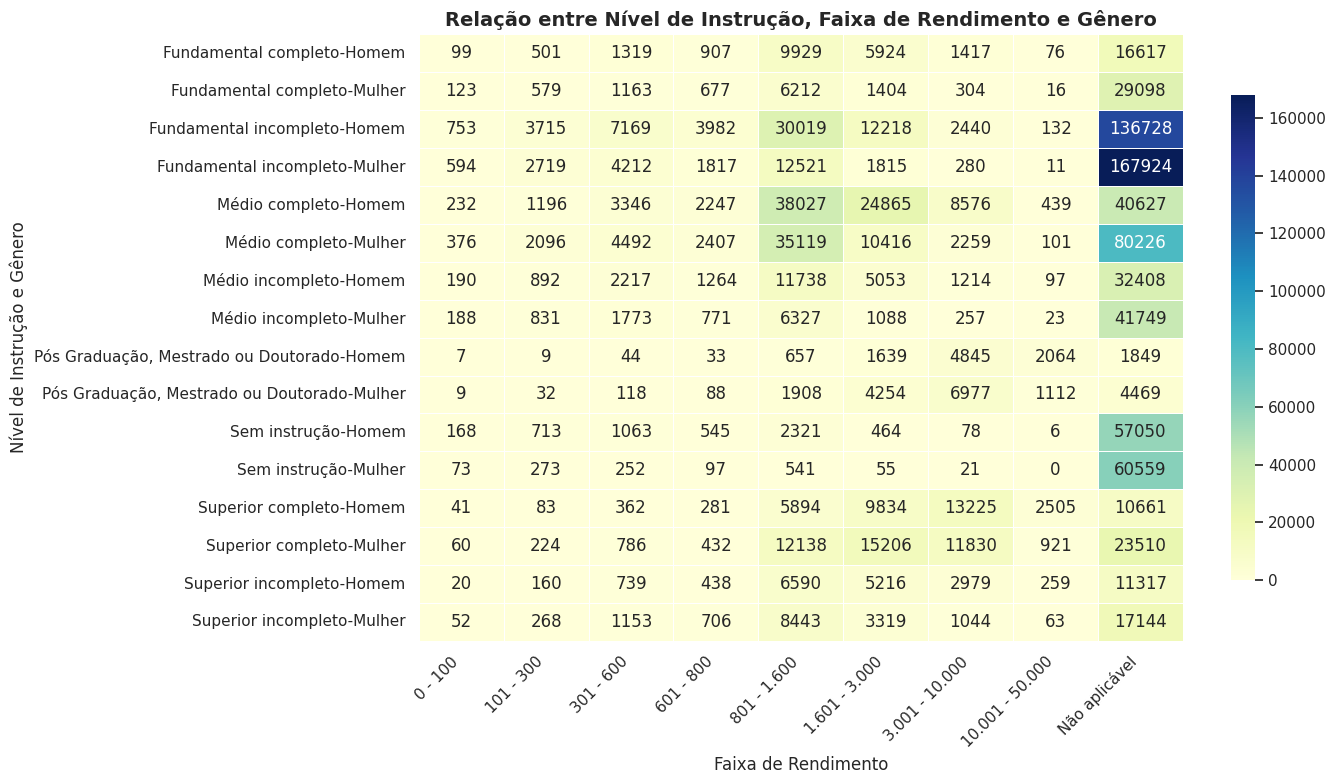

In [ ]:
import seaborn as sns

relacao_df = spark.sql("""
SELECT
    NUM_MES_PESQUISA,
    DSC_NIVEL_INSTRUCAO,
    DSC_SEXO,
    DSC_FAIXA_RECEBIDO,
    COUNT(*) AS TOTAL
FROM tabela_microdados
WHERE DSC_FAIXA_RECEBIDO IS NOT NULL
GROUP BY NUM_MES_PESQUISA, DSC_NIVEL_INSTRUCAO, DSC_SEXO, DSC_FAIXA_RECEBIDO
ORDER BY NUM_MES_PESQUISA, DSC_NIVEL_INSTRUCAO, DSC_FAIXA_RECEBIDO
""").toPandas()

faixa_ordem = [
    "0 - 100", "101 - 300", "301 - 600", "601 - 800", "801 - 1.600",
    "1.601 - 3.000", "3.001 - 10.000", "10.001 - 50.000", "Não aplicável"
]

relacao_df['DSC_FAIXA_RECEBIDO'] = pd.Categorical(
    relacao_df['DSC_FAIXA_RECEBIDO'], categories=faixa_ordem, ordered=True
)

heatmap_data = relacao_df.pivot_table(
    index=['DSC_NIVEL_INSTRUCAO', 'DSC_SEXO'],
    columns='DSC_FAIXA_RECEBIDO',
    values='TOTAL',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title('Relação entre Nível de Instrução, Faixa de Rendimento e Gênero', fontsize=14, fontweight='bold')
plt.xlabel('Faixa de Rendimento', fontsize=12)
plt.ylabel('Nível de Instrução e Gênero', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

### **7. Relação entre sintomas, faixa etária e acesso a hospitais**

In [ ]:
spark.sql("""
SELECT
 NUM_MES_PESQUISA,
 CASE
   WHEN NUM_IDADE_MORADOR BETWEEN 0 AND 17 THEN '0-17'
   WHEN NUM_IDADE_MORADOR BETWEEN 18 AND 35 THEN '18-35'
   WHEN NUM_IDADE_MORADOR BETWEEN 36 AND 60 THEN '36-60'
 ELSE '60+'
 END AS FAIXA_ETARIA,
 COUNT(*) AS TOTAL_SINTOMAS,
 SUM(CASE WHEN DSC_FOI_ESTABELECIMENTO_SAUDE = 'Sim' THEN 1 ELSE 0 END) AS PROCUROU_SAUDE
FROM tabela_microdados
WHERE DSC_FEBRE = 'Sim' OR DSC_TOSSE = 'Sim' OR DSC_DOR_PEITO = 'Sim'
GROUP BY NUM_MES_PESQUISA, FAIXA_ETARIA
ORDER BY NUM_MES_PESQUISA, FAIXA_ETARIA
""").show()

+----------------+------------+--------------+--------------+
|NUM_MES_PESQUISA|FAIXA_ETARIA|TOTAL_SINTOMAS|PROCUROU_SAUDE|
+----------------+------------+--------------+--------------+
|               7|        0-17|          1972|           564|
|               7|       18-35|          3048|          1175|
|               7|       36-60|          4677|          1732|
|               7|         60+|          2110|           619|
|               9|        0-17|          1443|           483|
|               9|       18-35|          1842|           744|
|               9|       36-60|          2689|          1034|
|               9|         60+|          1405|           479|
|              11|        0-17|          1369|           485|
|              11|       18-35|          1806|           784|
|              11|       36-60|          2558|          1067|
|              11|         60+|          1227|           438|
+----------------+------------+--------------+--------------+



In [ ]:
sintomas_acesso_df = spark.sql("""
SELECT
    NUM_MES_PESQUISA,
    CASE
        WHEN NUM_IDADE_MORADOR BETWEEN 0 AND 17 THEN '0-17'
        WHEN NUM_IDADE_MORADOR BETWEEN 18 AND 35 THEN '18-35'
        WHEN NUM_IDADE_MORADOR BETWEEN 36 AND 60 THEN '36-60'
        ELSE '60+'
    END AS FAIXA_ETARIA,
    COUNT(*) AS TOTAL_SINTOMAS,
    SUM(CASE WHEN DSC_FOI_ESTABELECIMENTO_SAUDE = 'Sim' THEN 1 ELSE 0 END) AS PROCUROU_SAUDE
FROM tabela_microdados
WHERE DSC_FEBRE = 'Sim' OR DSC_TOSSE = 'Sim' OR DSC_DOR_PEITO = 'Sim'
GROUP BY NUM_MES_PESQUISA, FAIXA_ETARIA
ORDER BY NUM_MES_PESQUISA, FAIXA_ETARIA
""").toPandas()

sintomas_acesso_df['TAXA_PROCURA'] = ((sintomas_acesso_df['PROCUROU_SAUDE'] / sintomas_acesso_df['TOTAL_SINTOMAS']) * 100).round(2)

sintomas_acesso_df['NUM_MES_PESQUISA'] = sintomas_acesso_df['NUM_MES_PESQUISA'].replace({
    7: "Julho",
    9: "Setembro",
    11: "Novembro"
})

fig = px.bar(
    sintomas_acesso_df,
    x="FAIXA_ETARIA",
    y="TAXA_PROCURA",
    color="NUM_MES_PESQUISA",
    text="TAXA_PROCURA",
    title="Relação entre Sintomas, Faixa Etária e Acesso a Hospitais",
    labels={"TAXA_PROCURA": "Taxa de Procura por Saúde (%)", "FAIXA_ETARIA": "Faixa Etária"},
    barmode="group",
)

fig.update_layout(
    xaxis_title="Faixa Etária",
    yaxis_title="Taxa de Procura por Saúde (%)",
    legend_title="Mês da Pesquisa",
    font=dict(size=12, family="Arial", color="black"),
    template="plotly_white",
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside', marker=dict(line=dict(width=1, color='black')))

fig.show()

## **Análise avançada**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [ ]:
spark.sql("""
SELECT NUM_MES_PESQUISA, COUNT(*) AS QTDE_REGISTROS
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA
ORDER BY NUM_MES_PESQUISA;
""").show()

+----------------+--------------+
|NUM_MES_PESQUISA|QTDE_REGISTROS|
+----------------+--------------+
|               7|        384166|
|               9|        387298|
|              11|        381438|
+----------------+--------------+



### **1. Comportamento Clínico**
Insights a serem explorados:

- Sintomas mais prevalentes ao longo dos meses e sua distribuição por UF.
- Correlação entre sintomas graves (ex: dificuldade respiratória) e hospitalizações.
- Comparar sintomas por faixa etária e sexo, identificando grupos de risco.

**Sintomas mais prevalentes ao longo dos meses e por UF**

In [ ]:
spark.sql("""
SELECT
    NUM_MES_PESQUISA,
    UF,
    COUNT(CASE WHEN DSC_FEBRE = 'Sim' THEN 1 END) AS febre,
    COUNT(CASE WHEN DSC_TOSSE = 'Sim' THEN 1 END) AS tosse,
    COUNT(CASE WHEN DSC_DIFICULDADE_RESPIRATORIA = 'Sim' THEN 1 END) AS dificuldade_respiratoria,
    COUNT(CASE WHEN DSC_PERDA_OLFATO_PALADAR = 'Sim' THEN 1 END) AS perda_olfato_paladar
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA, UF
ORDER BY NUM_MES_PESQUISA, UF;
""").show()

+----------------+-------------------+-----+-----+------------------------+--------------------+
|NUM_MES_PESQUISA|                 UF|febre|tosse|dificuldade_respiratoria|perda_olfato_paladar|
+----------------+-------------------+-----+-----+------------------------+--------------------+
|               7|               Acre|  210|  195|                     107|                 127|
|               7|            Alagoas|  227|  270|                      99|                 156|
|               7|              Amapá|   77|  105|                      51|                  45|
|               7|           Amazonas|  204|  234|                      87|                 114|
|               7|              Bahia|  277|  344|                     127|                 144|
|               7|              Ceará|  311|  382|                     134|                 183|
|               7|   Distrito Federal|  151|  203|                      99|                 126|
|               7|     Espírit

In [ ]:
sintomas_df = spark.sql("""
SELECT
    NUM_MES_PESQUISA,
    UF,
    COUNT(CASE WHEN DSC_FEBRE = 'Sim' THEN 1 END) AS febre,
    COUNT(CASE WHEN DSC_TOSSE = 'Sim' THEN 1 END) AS tosse,
    COUNT(CASE WHEN DSC_DIFICULDADE_RESPIRATORIA = 'Sim' THEN 1 END) AS dificuldade_respiratoria,
    COUNT(CASE WHEN DSC_PERDA_OLFATO_PALADAR = 'Sim' THEN 1 END) AS perda_olfato_paladar
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA, UF
ORDER BY NUM_MES_PESQUISA, UF;
""").toPandas()

fig = px.bar(sintomas_df, x='UF', y=['febre', 'tosse', 'dificuldade_respiratoria', 'perda_olfato_paladar'],
             title='Prevalência de Principais Sintomas da COVID-19 por Estado Brasileiro',
             barmode='stack',
             labels={'value':'Número de Ocorrências', 'variable':'Sintoma'})
fig.update_layout(xaxis_title="Unidade Federativa")
fig.show()

**Correlação entre sintomas graves e hospitalizações**

In [ ]:
spark.sql("""
SELECT
    NUM_MES_PESQUISA,
    COUNT(CASE WHEN DSC_DIFICULDADE_RESPIRATORIA = 'Sim' AND DSC_FOI_INTERNADO = 'Sim' THEN 1 END) AS internacoes_graves,
    COUNT(*) AS total_casos,
    ROUND((COUNT(CASE WHEN DSC_DIFICULDADE_RESPIRATORIA = 'Sim' AND DSC_FOI_INTERNADO = 'Sim' THEN 1 END) / COUNT(*)) * 100, 2) AS taxa_internacao
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA
ORDER BY NUM_MES_PESQUISA;
""").show()

+----------------+------------------+-----------+---------------+
|NUM_MES_PESQUISA|internacoes_graves|total_casos|taxa_internacao|
+----------------+------------------+-----------+---------------+
|               7|               151|     384166|           0.04|
|               9|               102|     387298|           0.03|
|              11|               101|     381438|           0.03|
+----------------+------------------+-----------+---------------+



In [ ]:
internacoes_df = spark.sql("""
SELECT
    NUM_MES_PESQUISA,
    COUNT(CASE WHEN DSC_DIFICULDADE_RESPIRATORIA = 'Sim' AND DSC_FOI_INTERNADO = 'Sim' THEN 1 END) AS internacoes_graves,
    COUNT(*) AS total_casos,
    ROUND((COUNT(CASE WHEN DSC_DIFICULDADE_RESPIRATORIA = 'Sim' AND DSC_FOI_INTERNADO = 'Sim' THEN 1 END) / COUNT(*)) * 100, 2) AS taxa_internacao
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA
ORDER BY NUM_MES_PESQUISA;
""").toPandas()

internacoes_df['NUM_MES_PESQUISA'] = internacoes_df['NUM_MES_PESQUISA'].replace({7: "Julho", 9: "Setembro", 11: "Novembro"})

fig = px.line(internacoes_df,
              x='NUM_MES_PESQUISA',
              y='taxa_internacao',
              markers=True,
              title='Taxa de Internação por Sintomas Graves (Dificuldade Respiratória) ao Longo dos Meses',
              labels={'taxa_internacao': 'Taxa de Internação (%)', 'NUM_MES_PESQUISA': 'Mês da Pesquisa'},
              line_shape='linear')

fig.add_scatter(x=internacoes_df['NUM_MES_PESQUISA'],
                y=internacoes_df['internacoes_graves'],
                mode='lines+markers',
                name='Internações Graves',
                line=dict(dash='dash'))

fig.update_layout(
    title="Correlação entre Sintomas Graves (Dificuldade Respiratória) e Hospitalizações (COVID-19, 2020)",
    xaxis_title="Mês da Pesquisa",
    yaxis_title="Taxa de Internação (%) / Internações Graves",
    font=dict(size=12, family="Arial", color="black"),
    legend_title="Indicadores",
    template="plotly_white",
    hovermode="x unified"
)

fig.show()

**Comparar sintomas por faixa etária e sexo**

In [ ]:
spark.sql("""
SELECT
    NUM_IDADE_MORADOR,
    DSC_SEXO,
    COUNT(CASE WHEN DSC_TOSSE = 'Sim' THEN 1 END) AS tosse,
    COUNT(CASE WHEN DSC_FEBRE = 'Sim' THEN 1 END) AS febre
FROM tabela_microdados
GROUP BY NUM_IDADE_MORADOR, DSC_SEXO
ORDER BY NUM_IDADE_MORADOR, DSC_SEXO;
""").show()

+-----------------+--------+-----+-----+
|NUM_IDADE_MORADOR|DSC_SEXO|tosse|febre|
+-----------------+--------+-----+-----+
|                0|   Homem|   46|   59|
|                0|  Mulher|   58|   75|
|                1|   Homem|  107|  122|
|                1|  Mulher|   93|  120|
|                2|   Homem|   90|   75|
|                2|  Mulher|   91|   74|
|                3|   Homem|   94|   77|
|                3|  Mulher|   88|   77|
|                4|   Homem|  101|   74|
|                4|  Mulher|   91|   69|
|                5|   Homem|   81|   68|
|                5|  Mulher|   86|   67|
|                6|   Homem|  104|   64|
|                6|  Mulher|   90|   59|
|                7|   Homem|   83|   51|
|                7|  Mulher|   78|   56|
|                8|   Homem|  110|   63|
|                8|  Mulher|   85|   66|
|                9|   Homem|   79|   61|
|                9|  Mulher|   85|   52|
+-----------------+--------+-----+-----+
only showing top

In [ ]:
sintomas_idade_df = spark.sql("""
SELECT
    NUM_IDADE_MORADOR,
    DSC_SEXO,
    COUNT(CASE WHEN DSC_TOSSE = 'Sim' THEN 1 END) AS tosse,
    COUNT(CASE WHEN DSC_FEBRE = 'Sim' THEN 1 END) AS febre
FROM tabela_microdados
GROUP BY NUM_IDADE_MORADOR, DSC_SEXO
ORDER BY NUM_IDADE_MORADOR, DSC_SEXO;
""").toPandas()

fig = px.line(sintomas_idade_df,
              x="NUM_IDADE_MORADOR",
              y=["tosse", "febre"],
              color="DSC_SEXO",
              title="Comparação de Sintomas (Tosse e Febre) por Faixa Etária e Sexo",
              labels={"NUM_IDADE_MORADOR": "Faixa Etária", "value": "Número de Casos", "variable": "Sintoma"},
              line_shape='linear')

fig.update_layout(
    title="Sintomas de Tosse e Febre por Faixa Etária e Sexo",
    xaxis_title="Faixa Etária",
    yaxis_title="Número de Casos",
    font=dict(size=12, family="Arial", color="black"),
    legend_title="Sexo",
    template="plotly_white",
    hovermode="x unified",
    xaxis=dict(tickmode='linear', tick0=0, dtick=1)
)

fig.add_hline(y=sintomas_idade_df['tosse'].mean(), line_dash="dot", line_color="blue", annotation_text="Média Tosse", annotation_position="top right")
fig.add_hline(y=sintomas_idade_df['febre'].mean(), line_dash="dot", line_color="red", annotation_text="Média Febre", annotation_position="top right")

fig.show()

### **2.Comportamento da População**

Insights a serem explorados:

- Análise do trabalho presencial (DSC_TELETRABALHO) por idade, sexo e UF:
- Identificar quais grupos precisaram sair mais de casa.
- Analisar a busca por atendimento médico (DSC_FOI_ESTABELECIMENTO_SAUDE):
- Avaliar regiões com menor acesso ao atendimento e correlação com infraestrutura (UF).
- Contatos com outras pessoas:
- Analisar comportamento da população em relação ao isolamento (DSC_CONTATO_COM_OUTRAS_PESSOAS).

**Trabalho presencial por idade, sexo e UF**

In [ ]:
spark.sql("""
SELECT
    UF,
    NUM_IDADE_MORADOR,
    DSC_SEXO,
    COUNT(*) AS quantidade_trabalhadores
FROM tabela_microdados
WHERE DSC_TELETRABALHO = 'Não'
GROUP BY UF, NUM_IDADE_MORADOR, DSC_SEXO
ORDER BY quantidade_trabalhadores DESC;
""").show()

+--------------+-----------------+--------+------------------------+
|            UF|NUM_IDADE_MORADOR|DSC_SEXO|quantidade_trabalhadores|
+--------------+-----------------+--------+------------------------+
|      Maranhão|               38|   Homem|                      49|
|      Maranhão|               39|   Homem|                      40|
|      Maranhão|               31|   Homem|                      39|
|  Minas Gerais|               48|   Homem|                      38|
|      Maranhão|               37|   Homem|                      36|
|    Pernambuco|               42|   Homem|                      36|
|      Maranhão|               32|   Homem|                      35|
|      Maranhão|               23|   Homem|                      33|
|      Maranhão|               33|   Homem|                      33|
|  Minas Gerais|               41|   Homem|                      32|
|  Minas Gerais|               46|   Homem|                      32|
|  Minas Gerais|               37|

In [ ]:
trabalho_df = spark.sql("""
SELECT
    UF,
    NUM_IDADE_MORADOR,
    DSC_SEXO,
    COUNT(*) AS quantidade_trabalhadores
FROM tabela_microdados
WHERE DSC_TELETRABALHO = 'Não'
GROUP BY UF, NUM_IDADE_MORADOR, DSC_SEXO
ORDER BY quantidade_trabalhadores DESC;
""").toPandas()

trabalho_df['FAIXA_ETARIA'] = pd.cut(trabalho_df['NUM_IDADE_MORADOR'], bins=[0, 17, 35, 60, 100], labels=['0-17', '18-35', '36-60', '60+'])

trabalho_df = trabalho_df.sort_values(by=['FAIXA_ETARIA'])

fig = px.bar(trabalho_df, x="UF", y="quantidade_trabalhadores", color="DSC_SEXO",
             facet_col="FAIXA_ETARIA", title="Trabalho Presencial por UF, Sexo e Faixa Etária",
             category_orders={"FAIXA_ETARIA": ['0-17', '18-35', '36-60', '60+']})
fig.update_layout(
    xaxis={'tickangle': 90},
    yaxis_title="Quantidade de Trabalhadores",
    legend_title="Sexo",
    barmode='stack'
)

for annotation in fig['layout']['annotations']:
    if annotation['text'].startswith('FAIXA_ETARIA='):
        annotation['text'] = annotation['text'].split("=")[-1]

fig.update_layout(margin=dict(l=50, r=50, t=80, b=50))

fig.show()

**Busca por atendimento médico por UF**

In [ ]:
spark.sql("""
SELECT
    UF,
    COUNT(CASE WHEN DSC_FOI_ESTABELECIMENTO_SAUDE = 'Sim' THEN 1 END) AS buscaram_atendimento,
    COUNT(*) AS total_pessoas,
    ROUND((COUNT(CASE WHEN DSC_FOI_ESTABELECIMENTO_SAUDE = 'Sim' THEN 1 END) / COUNT(*)) * 100, 2) AS taxa_atendimento
FROM tabela_microdados
GROUP BY UF
ORDER BY taxa_atendimento ASC;
""").show()

+-------------------+--------------------+-------------+----------------+
|                 UF|buscaram_atendimento|total_pessoas|taxa_atendimento|
+-------------------+--------------------+-------------+----------------+
|     Rio de Janeiro|                 672|        87260|            0.77|
|         Pernambuco|                 439|        50199|            0.87|
|              Ceará|                 471|        50737|            0.93|
|           Rondônia|                 167|        16531|            1.01|
|            Alagoas|                 361|        35019|            1.03|
|           Maranhão|                 645|        60361|            1.07|
|              Piauí|                 275|        25511|            1.08|
|           Amazonas|                 330|        30497|            1.08|
|              Bahia|                 574|        52081|             1.1|
|               Acre|                 218|        19137|            1.14|
|     Espírito Santo|                 

In [ ]:
atendimento_df = spark.sql("""
SELECT
    UF,
    COUNT(CASE WHEN DSC_FOI_ESTABELECIMENTO_SAUDE = 'Sim' THEN 1 END) AS buscaram_atendimento,
    COUNT(*) AS total_pessoas,
    ROUND((COUNT(CASE WHEN DSC_FOI_ESTABELECIMENTO_SAUDE = 'Sim' THEN 1 END) / COUNT(*)) * 100, 2) AS taxa_atendimento
FROM tabela_microdados
GROUP BY UF
ORDER BY taxa_atendimento ASC;
""").toPandas()

fig = px.bar(atendimento_df,
             x="taxa_atendimento",
             y="UF",
             orientation="h",
             title="Taxa de Atendimento Médico por UF",
             labels={"taxa_atendimento": "Taxa de Atendimento (%)", "UF": "Unidade Federativa"},
             color="taxa_atendimento",
             color_continuous_scale="Viridis",
             text="taxa_atendimento",
             text_auto=True)

fig.update_layout(
    title="Taxa de Atendimento Médico por UF",
    xaxis_title="Taxa de Atendimento (%)",
    yaxis_title="Unidade Federativa",
    font=dict(size=12, family="Arial", color="black"),
    template="plotly_white",
    xaxis=dict(showgrid=True, zeroline=False),
    yaxis=dict(tickmode='array', tickvals=atendimento_df['UF']),
    showlegend=False  #
)

media_taxa = atendimento_df["taxa_atendimento"].mean()
fig.add_vline(x=media_taxa, line_dash="dot", line_color="red", annotation_text="Média", annotation_position="top right")

fig.show()

### **3.Características Econômicas da Sociedade**

Insights a serem explorados:

- Impacto do desemprego: Filtrar por pessoas que não procuraram trabalho (DSC_MOTIVO_N_PROCUROU_TRABALHO) e analisar por nível de escolaridade.
- Dependência do auxílio emergencial (DSC_AUXILIO_CORONAVIRUS):
- Identificar regiões e faixas de renda com maior dependência do auxílio.
- Renda e impacto por setor (DSC_AREA_ATUACAO):
- Analisar setores mais impactados ao longo dos 3 meses.

**Impacto do desemprego por nível de escolaridade**

In [ ]:
spark.sql("""
SELECT
    DSC_NIVEL_INSTRUCAO,
    COUNT(*) AS quantidade_desempregados
FROM tabela_microdados
WHERE DSC_MOTIVO_N_PROCUROU_TRABALHO IS NOT NULL
GROUP BY DSC_NIVEL_INSTRUCAO
ORDER BY quantidade_desempregados DESC;
""").show()

+--------------------+------------------------+
| DSC_NIVEL_INSTRUCAO|quantidade_desempregados|
+--------------------+------------------------+
|Fundamental incom...|                  389050|
|      Médio completo|                  257051|
|       Sem instrução|                  124279|
|    Médio incompleto|                  108080|
|   Superior completo|                  108019|
|Fundamental completo|                   76365|
| Superior incompleto|                   59914|
|Pós Graduação, Me...|                   30144|
+--------------------+------------------------+



In [ ]:
desemprego_df = spark.sql("""
SELECT
    DSC_NIVEL_INSTRUCAO,
    COUNT(*) AS quantidade_desempregados
FROM tabela_microdados
WHERE DSC_MOTIVO_N_PROCUROU_TRABALHO IS NOT NULL
GROUP BY DSC_NIVEL_INSTRUCAO
ORDER BY quantidade_desempregados DESC;
""").toPandas()

fig = px.pie(desemprego_df,
             names="DSC_NIVEL_INSTRUCAO",
             values="quantidade_desempregados",
             title="Impacto do Desemprego por Escolaridade",
             color="DSC_NIVEL_INSTRUCAO",
             color_discrete_sequence=px.colors.qualitative.Set3,
             hole=0.3,
             labels={'quantidade_desempregados': 'Quantidade de Desempregados'})

fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

fig.update_layout(
    title="Impacto do Desemprego por Escolaridade",
    title_x=0.5,
    title_y=0.95,
    font=dict(size=12, family="Arial", color="black"),
    template="plotly_white",
    showlegend=True,
    legend=dict(
        x=0.9,
        y=0.5,
        xanchor="left",
        yanchor="middle"
    )
)

fig.show()

**Dependência do auxílio emergencial**

In [ ]:
spark.sql("""
SELECT
    UF,
    COUNT(*) AS beneficiarios_auxilio
FROM tabela_microdados
WHERE DSC_AUXILIO_CORONAVIRUS = 'Sim'
GROUP BY UF
ORDER BY beneficiarios_auxilio DESC;
""").show()

+-------------------+---------------------+
|                 UF|beneficiarios_auxilio|
+-------------------+---------------------+
|       Minas Gerais|                48537|
|           Maranhão|                41537|
|          São Paulo|                39416|
|     Rio de Janeiro|                36489|
|              Bahia|                34097|
|              Ceará|                32788|
|         Pernambuco|                31684|
|            Alagoas|                24313|
|               Pará|                23699|
|             Paraná|                23604|
|     Espírito Santo|                22860|
|  Rio Grande do Sul|                21161|
|              Goiás|                20329|
|           Amazonas|                19903|
|     Santa Catarina|                19193|
|            Paraíba|                18423|
|              Piauí|                16571|
|        Mato Grosso|                15932|
|            Sergipe|                15697|
|Rio Grande do Norte|           

In [ ]:
auxilio_df = spark.sql("""
SELECT
    UF,
    COUNT(*) AS beneficiarios_auxilio
FROM tabela_microdados
WHERE DSC_AUXILIO_CORONAVIRUS = 'Sim'
GROUP BY UF
ORDER BY beneficiarios_auxilio DESC;
""").toPandas()

fig = px.bar(auxilio_df,
             x="UF",
             y="beneficiarios_auxilio",
             title="Dependência do Auxílio Emergencial por UF",
             color="beneficiarios_auxilio",
             color_continuous_scale="Viridis",
             labels={"beneficiarios_auxilio": "Número de Beneficiários", "UF": "Unidade Federativa"})

fig.update_xaxes(tickangle=45)

fig.update_layout(
    title="Dependência do Auxílio Emergencial por UF",
    title_x=0.5,
    title_y=0.95,
    font=dict(size=12, family="Arial", color="black"),
    template="plotly_white",
    showlegend=False,
    xaxis_title="Unidade Federativa",
    yaxis_title="Número de Beneficiários",
    xaxis=dict(tickmode="array"),
    plot_bgcolor="white",
    yaxis=dict(showgrid=True),
    margin=dict(l=40, r=40, t=40, b=100)
)

fig.show()